In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

In [3]:
data = pd.read_excel("Homicidios_victimas.xlsx")

In [4]:
data.shape

(717, 10)

In [5]:
data.shape
data.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


#4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

In [7]:
data.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

# 4.1 Datos faltantes
El número total de registros de 717, al parcer no hay datos faltantes. 
Se procedera a revisar las columnas que tienen como valor "SD" osea sin dato para eliminarlas. Al eliminarlas quedaron 608 filas.


In [8]:
# Verificar cuántos valores "SD" hay en cada columna
sd_count = data.apply(lambda x: (x == 'SD').sum())
# Mostrar los resultados solo para las columnas que tienen "SD"
sd_columns = sd_count[sd_count > 0]
# Imprimir las columnas y la cantidad de "SD" en ellas
print(sd_columns)


ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64


In [9]:

# Habilitar el comportamiento futuro para evitar el warning
pd.set_option('future.no_silent_downcasting', True)

# Reemplazar los valores "SD" por NaN en todo el DataFrame
data.replace('SD', np.nan, inplace=True)

# Eliminar las filas que contienen NaN (que originalmente eran "SD")
data.dropna(inplace=True)

In [10]:
data

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
5,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


# 4.2 Columnas irrelevantes

En este caso no contamos con columnas categoricas y numéricas  de un sólo nivel, sin embargo, se cuenta con columnas reduntantes, tenemos una columna fecha y ademas columnas separadas de año, mes, y dia.
Tengo dudas aun de la funcionalidad de las columnas, si pueden ser relevante o no,  las voy a dejar (y más adelante en posteriores etapas podre darme cuenta de si se debe preservar o no).


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             608 non-null    object        
 1   FECHA                608 non-null    datetime64[ns]
 2   AAAA                 608 non-null    int64         
 3   MM                   608 non-null    int64         
 4   DD                   608 non-null    int64         
 5   ROL                  608 non-null    object        
 6   VICTIMA              608 non-null    object        
 7   SEXO                 608 non-null    object        
 8   EDAD                 608 non-null    object        
 9   FECHA_FALLECIMIENTO  608 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 52.2+ KB


In [12]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['ID_hecho', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna ID_hecho: 594 subniveles
Columna ROL: 4 subniveles
Columna VICTIMA: 7 subniveles
Columna SEXO: 2 subniveles
Columna EDAD: 84 subniveles
Columna FECHA_FALLECIMIENTO: 534 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas: pero antes voy a cambiar de tipo de dato a las columnas "EDAD" y "FECHA_FALLECIMIENTO"

In [13]:
data['FECHA_FALLECIMIENTO'] = pd.to_datetime(data['FECHA_FALLECIMIENTO'], errors='coerce')

In [14]:
data['EDAD'] = data['EDAD'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             608 non-null    object        
 1   FECHA                608 non-null    datetime64[ns]
 2   AAAA                 608 non-null    int64         
 3   MM                   608 non-null    int64         
 4   DD                   608 non-null    int64         
 5   ROL                  608 non-null    object        
 6   VICTIMA              608 non-null    object        
 7   SEXO                 608 non-null    object        
 8   EDAD                 608 non-null    int64         
 9   FECHA_FALLECIMIENTO  608 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 52.2+ KB


Una vez con las columnas convertidas a numericas debido a su naturaleza, se procede a su revisión

In [ ]:
data.describe()

,FECHA,AAAA,MM,DD,EDAD,FECHA_FALLECIMIENTO
count,608,608.000000,608.000000,608.000000,608.000000,608
mean,2018-11-18 15:04:44.210526208,2018.378289,6.565789,15.799342,42.567434,2018-11-19 22:32:22.105263104
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,1.000000,2016-01-01 00:00:00
25%,2017-07-13 18:00:00,2017.000000,3.000000,9.000000,27.000000,2017-07-13 18:00:00
50%,2018-09-09 00:00:00,2018.000000,6.500000,16.000000,37.000000,2018-09-09 00:00:00
75%,2020-03-10 18:00:00,2020.000000,10.000000,23.000000,57.000000,2020-03-11 00:00:00
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,95.000000,2022-01-03 00:00:00
std,NaN,1.623039,3.597860,8.669430,19.976149,NaN


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas y datos de tiempo

# 4.3 Filas repetidas

In [17]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (608, 10)
Tamaño del set después de eliminar las filas repetidas: (608, 10)


# 4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             608 non-null    object        
 1   FECHA                608 non-null    datetime64[ns]
 2   AAAA                 608 non-null    int64         
 3   MM                   608 non-null    int64         
 4   DD                   608 non-null    int64         
 5   ROL                  608 non-null    object        
 6   VICTIMA              608 non-null    object        
 7   SEXO                 608 non-null    object        
 8   EDAD                 608 non-null    int64         
 9   FECHA_FALLECIMIENTO  608 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 52.2+ KB


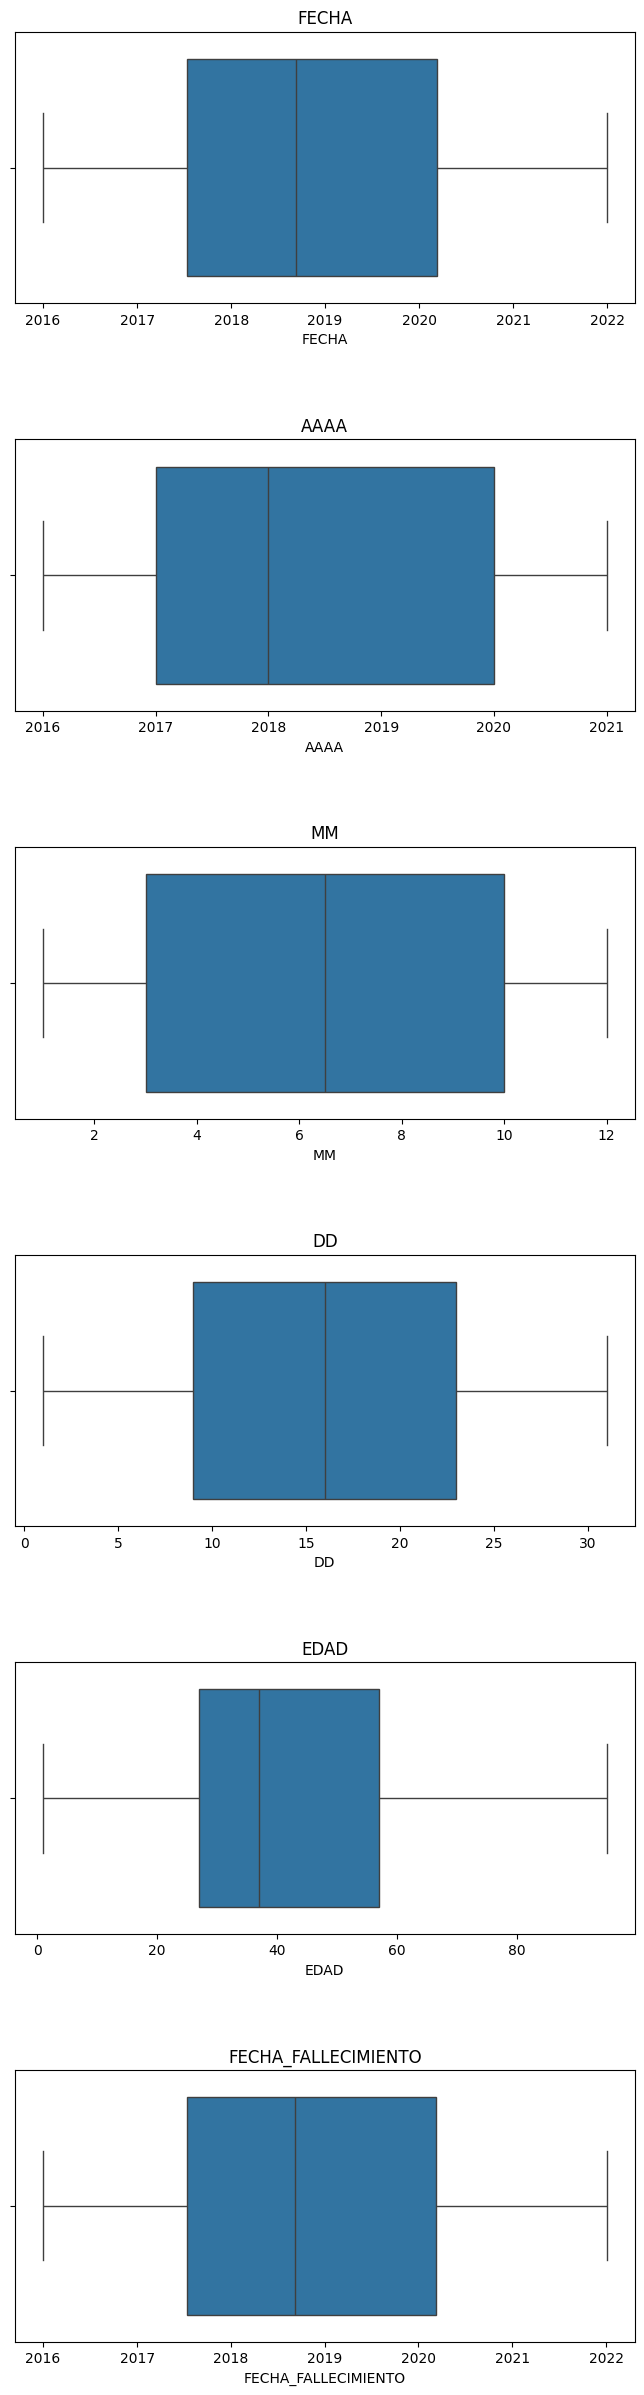

In [19]:
# Generar gráficas individuales pues las variables numéricas

cols_num = [ 'FECHA', 'AAAA', 'MM', 'DD',
            'EDAD', 'FECHA_FALLECIMIENTO']

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
- El data set no cuenta con outliers

# 4.5 Errores tipográficos en variables categóricas
En una variable categórica pueden aparecer sub-niveles que no corresponden abreviaturas, no abreviados o mal escritos que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.
Teniendo en cuenta las columnas categóricas que tenemos y sus subniveles; hay columnas con mas de 84 subniveles, serian complejo verlos en una gráfica, por lo tanto graficaremos los que se podrian unificar y modificar.


In [20]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['ID_hecho', 'ROL', 'VICTIMA', 'SEXO','FECHA_FALLECIMIENTO']
for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna ID_hecho: 594 subniveles
Columna ROL: 4 subniveles
Columna VICTIMA: 7 subniveles
Columna SEXO: 2 subniveles
Columna FECHA_FALLECIMIENTO: 534 subniveles


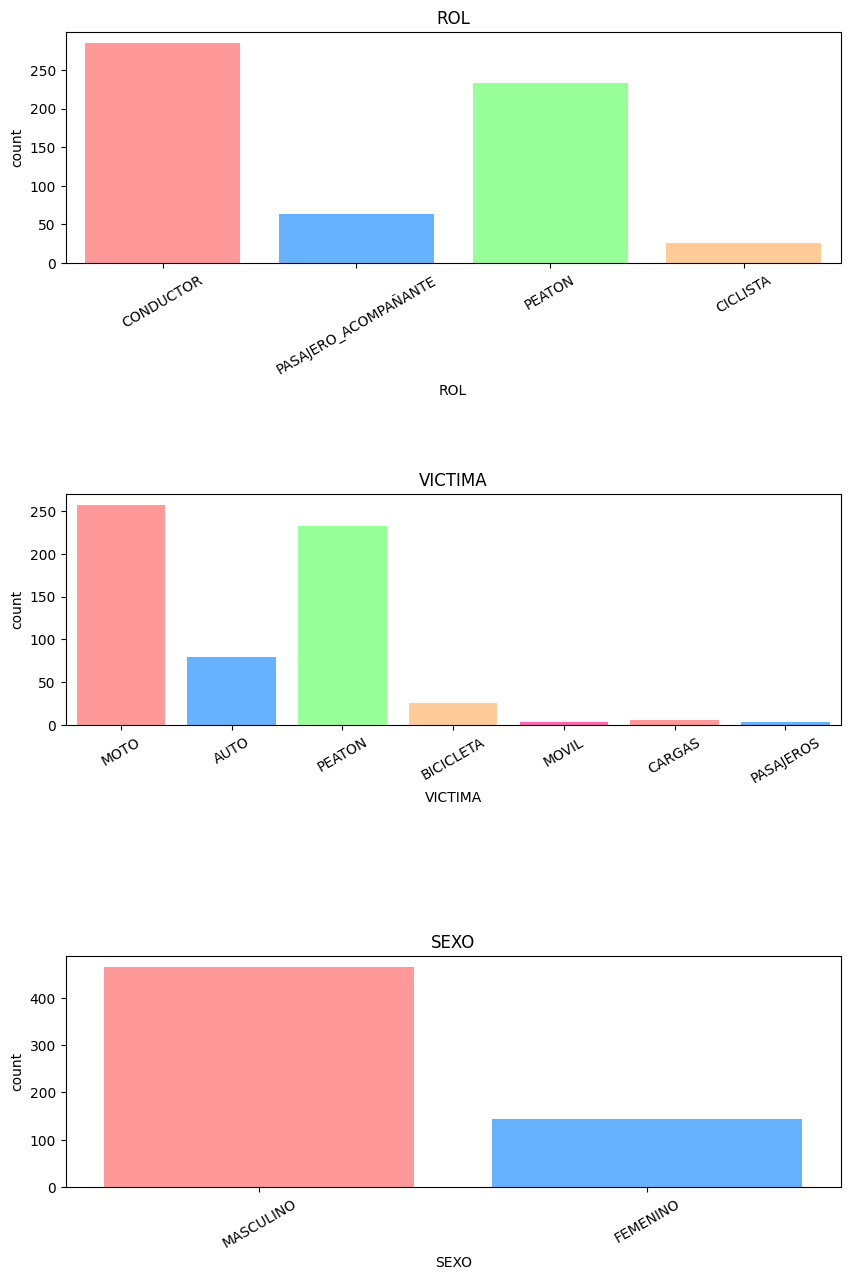

In [21]:
# Definir las columnas categóricas
cols_cat = ['ROL', 'VICTIMA', 'SEXO']

# Crear el lienzo de los gráficos
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 15)) 
fig.subplots_adjust(hspace=1)

# Lista de colores que puedes asignar a las barras
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF66B2']  # Puedes personalizar los colores

# Graficar cada columna con countplot
for i, col in enumerate(cols_cat):
    plot = sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=30)

    # Asignar colores a las barras
    for j, bar in enumerate(plot.patches):
        bar.set_facecolor(colors[j % len(colors)])  # Asignar colores ciclando en la lista de colores

# Mostrar gráfico
plt.show()


Al parecer los subniveles estan bien escritos, no hay subniveles repetidos.

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 717 registros y 10 columnas. El dataset resultante tiene 608 filas (109 menos) y 10 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [22]:
data.to_excel('victimas_listo.xlsx', index=False)
